In [167]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 

# seaboarn lib add
import seaborn as sns

import time

%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
    print('d')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('w')
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# ml lib
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer , load_digits

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold , cross_val_score , cross_validate , GridSearchCV
from   sklearn.tree            import DecisionTreeClassifier

from   sklearn.ensemble        import RandomForestClassifier , VotingClassifier , AdaBoostClassifier

from   xgboost                 import XGBClassifier

from   sklearn.svm             import SVC
from   sklearn.neighbors       import KNeighborsClassifier

from   sklearn.linear_model    import LogisticRegression

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , make_scorer , precision_recall_curve , roc_curve , roc_auc_score

from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler ,Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

import missingno as msno 

import graphviz

from IPython.display import Image


print('sklearn version - ' , sklearn.__version__)

numpy version  -  1.20.1
pandas version -  1.2.4
w
sklearn version -  0.24.1


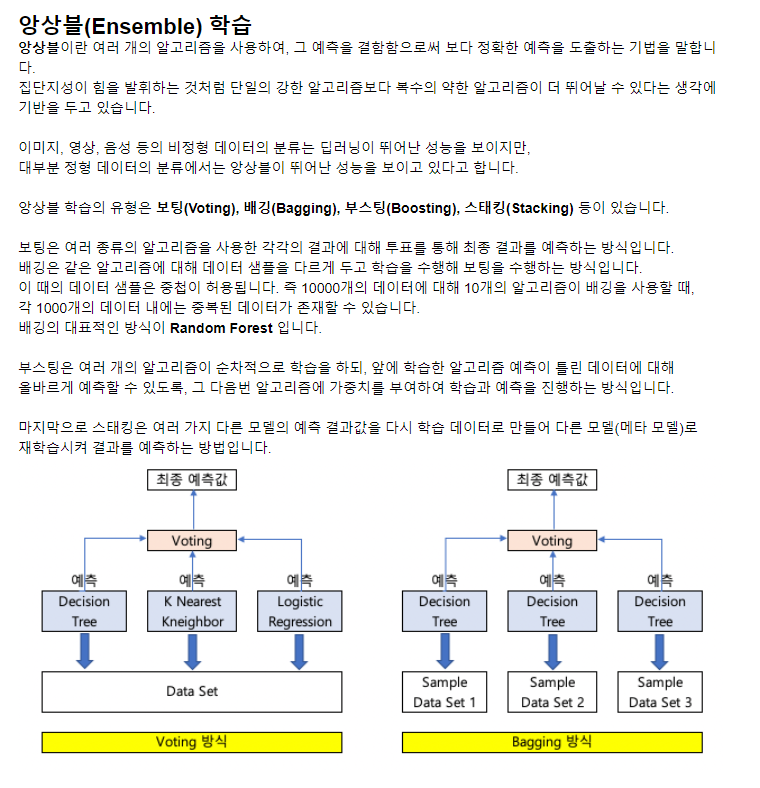

In [2]:
Image('c:\img/ensemble-01.png' , width=700)

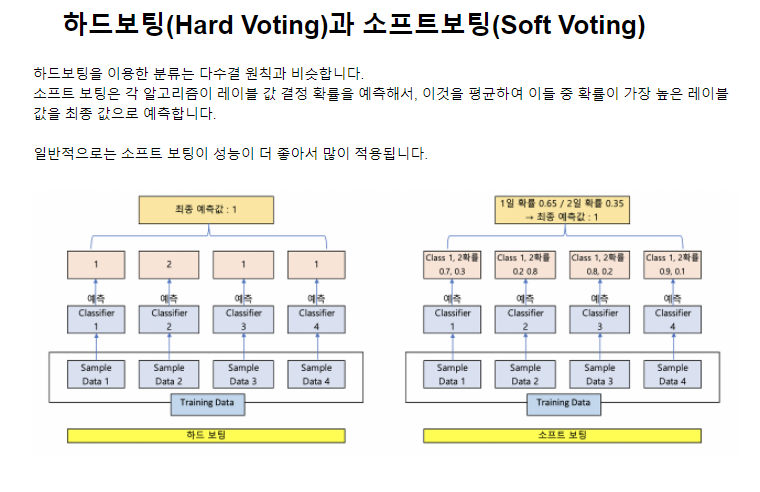

In [3]:
Image('c:\img/ensemble-02.png' , width=700)

#### Voting 연습

In [11]:
mnist = load_digits()
print('type - ' , type(mnist))
print('keys - ' , mnist.keys())

features , labels = mnist.data , mnist.target
features.shape , labels.shape

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


((1797, 64), (1797,))

In [21]:
print(features[1])
print()
print('target - ' , labels[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]

target -  1


In [22]:
feature_img = features[1].reshape(8,8)
feature_img

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

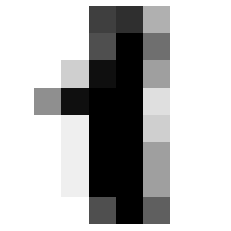

In [23]:
plt.imshow(feature_img , cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [24]:
X_train , X_test , y_train , y_test = train_test_split(features , 
                                                       labels , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [25]:
tree_model = DecisionTreeClassifier(criterion    = 'entropy' , 
                                    max_depth    = 8 , 
                                    max_features = 32 , 
                                    random_state = 35)

knn_model =  KNeighborsClassifier(n_neighbors = 299)

svm_model = SVC(probability = True)


In [26]:
def metrics_evaluation(target , prediction) :
    print('accuracy \n'  , accuracy_score(target , prediction))
    

In [27]:
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [28]:
metrics_evaluation(y_test , tree_pred)
metrics_evaluation(y_test , knn_pred)
metrics_evaluation(y_test , svm_pred)

accuracy 
 0.8694444444444445
accuracy 
 0.8555555555555555
accuracy 
 0.9916666666666667


In [29]:
print('앙상블을 구현하는 분류기 - VotingClassifier')
print()
hard_voting_model = VotingClassifier(estimators = [ ('tree' , tree_model) , ('knn' , knn_model) , ('svm' , svm_model)] ,
                                weights = [1,1,1] , 
                                voting = 'hard')
hard_voting_model.fit(X_train, y_train)
hard_voting_pred = hard_voting_model.predict(X_test)
metrics_evaluation(y_test , hard_voting_pred)

앙상블을 구현하는 분류기 - VotingClassifier

accuracy 
 0.9611111111111111


In [40]:
soft_voting_model = VotingClassifier(estimators = [ ('tree' , tree_model) , ('knn' , knn_model) , ('svm' , svm_model)] ,
                                weights = [1,1,1] , 
                                voting = 'soft')
soft_voting_model.fit(X_train, y_train)
soft_voting_pred = soft_voting_model.predict(X_test)
metrics_evaluation(y_test , soft_voting_pred)

accuracy 
 0.9388888888888889


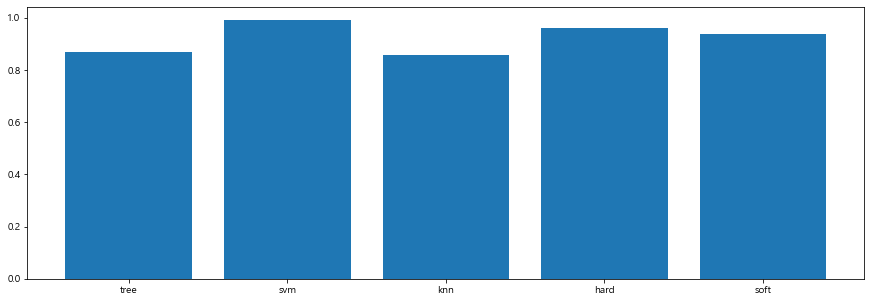

In [42]:
plt.figure(figsize = (15, 5))

x = np.arange(5)

plt.bar(x , height = [
    accuracy_score(y_test , tree_pred) , 
    accuracy_score(y_test , svm_pred) , 
    accuracy_score(y_test , knn_pred) , 
    accuracy_score(y_test , hard_voting_pred) , 
    accuracy_score(y_test , soft_voting_pred) , 
])

plt.xticks(x , ['tree' , 'svm' , 'knn' , 'hard' , 'soft'])
plt.show()
plt.close()

* 보팅(Voting) : 같은 데이터 세트를 이용하고 서로 다른 분류 알고리즘을 활용해서 예측
* 하드보팅 : 다수결 , 소프트보팅 : 확률
* 배깅(Bagging) :  서로다른 데이터 세트를 이용하고 같은 분류 알고리즘을 활용해서 예측
* 배깅 : 랜덤포레스트(확률)

In [30]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [48]:
tree_model     = DecisionTreeClassifier()

knn_model      =  KNeighborsClassifier()

svm_model      = SVC(probability = True)

logistic_model = LogisticRegression()


In [55]:
hard_voting_model = VotingClassifier(estimators = [ ('tree' , tree_model) , 
                                                    ('knn' , knn_model) , 
                                                    ('svm' , svm_model) , 
                                                    ('logistic' , logistic_model)] ,
                                weights = [1, 1, 1, 1] , 
                                voting = 'hard')

In [60]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data , 
                                                       cancer.target , 
                                                       test_size = 0.2 , 
                                                       random_state = 200)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [63]:
hard_voting_model.fit(X_train , y_train)
y_pred = hard_voting_model.predict(X_test) 
metrics_evaluation(y_test , y_pred)

accuracy 
 0.9210526315789473


In [62]:
print('개별 학습기의 예측 정확도 - ')
print()
classifier = [tree_model , knn_model , svm_model , logistic_model]
for c_ in classifier : 
    c_.fit(X_train, y_train)
    pred = c_.predict(X_test)
    print(c_.__class__.__name__ , '\t' , accuracy_score(y_test , pred) )

개별 학습기의 예측 정확도 - 

DecisionTreeClassifier 	 0.9210526315789473
KNeighborsClassifier 	 0.8859649122807017
SVC 	 0.8859649122807017
LogisticRegression 	 0.9035087719298246


#### Bagging - RandomForest (Decision Tree)

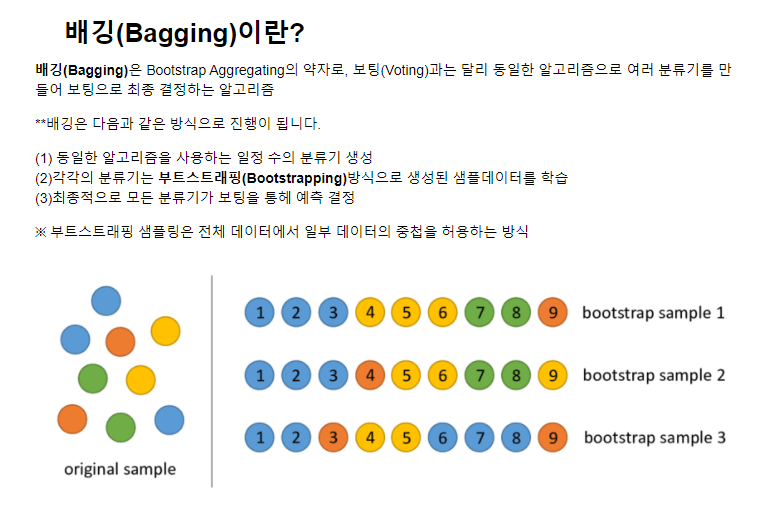

In [65]:
Image('c:\img/rf-01.png' , width=700)

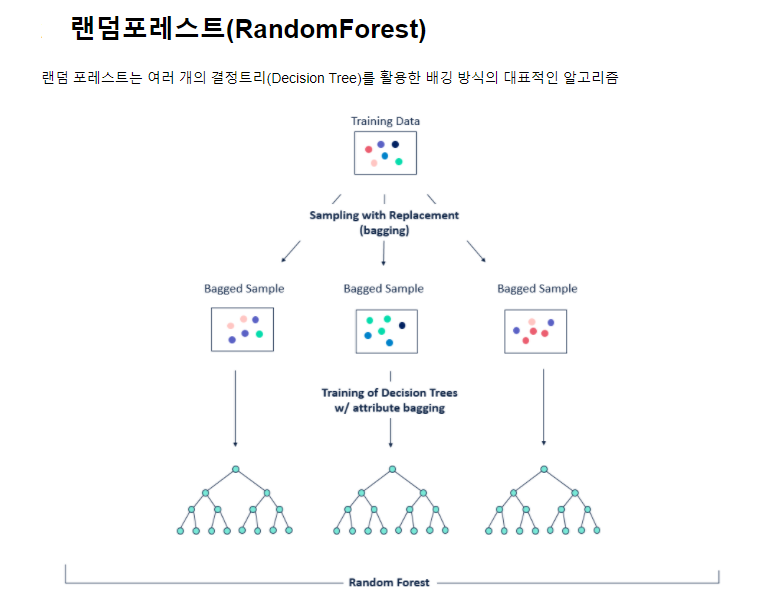

In [66]:
Image('c:\img/rf-02.png' , width=700)

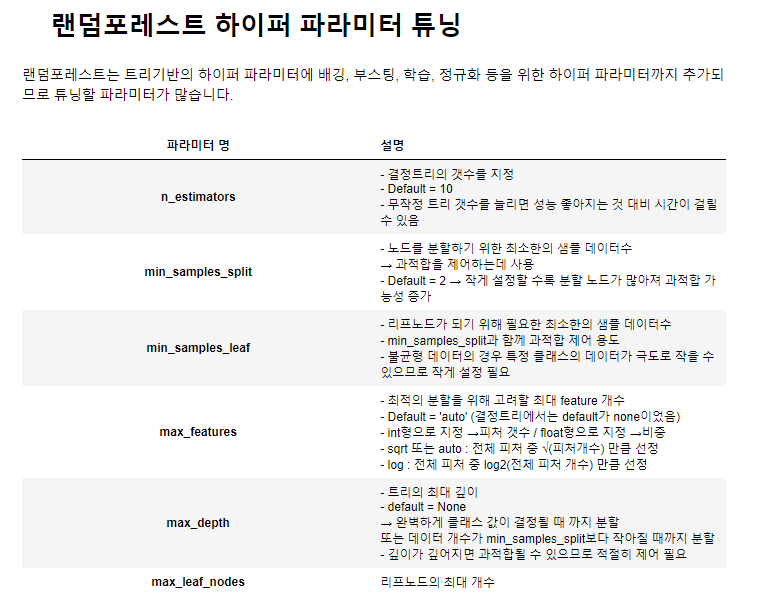

In [67]:
Image('c:\img/rf-03.png' , width=700)

In [ ]:
mnist = load_digits()
print('type - ' , type(mnist))
print('keys - ' , mnist.keys())

features , labels = mnist.data , mnist.target
features.shape , labels.shape

In [82]:
def user_crosss_val(classifier , features , labels) :
    cv_scores = []
    for i in range(10) :
        scores = cross_val_score(classifier , features , labels , cv=10 , scoring='accuracy')
        cv_scores.append(scores.mean())
        
#     scores = cross_val_score(classifier , features , labels , cv=10 , scoring='accuracy')
#     return scores
    return cv_scores

In [83]:
tree_cv_scores    = user_crosss_val(DecisionTreeClassifier() , features , labels)
bagging_cv_scores = user_crosss_val(RandomForestClassifier() , features , labels)

In [84]:
print('tree cross val - ')
print(tree_cv_scores)
print()
print('mean - ')
print(np.mean(tree_cv_scores))

tree cross val - 
[0.8235599006828057, 0.8319335816263191, 0.8319149596523898, 0.8302638112973308, 0.8324922408441962, 0.8280105524518933, 0.82243947858473, 0.8196865301055245, 0.8280105524518933, 0.8230446927374302]

mean - 
0.8271356300434511


In [85]:
print('bagging cross val - ')
print(bagging_cv_scores)
print()
print('mean - ')
print(np.mean(bagging_cv_scores))

bagging cross val - 
[0.9527001862197393, 0.9487957790192427, 0.9504531346989447, 0.9499037864680322, 0.9493482309124767, 0.9487957790192427, 0.9504593420235878, 0.9454562383612662, 0.9499037864680322, 0.9465704531346988]

mean - 
0.9492386716325264


- visualization

In [86]:
tree_bagging_frm = pd.DataFrame({
    'tree'    : tree_cv_scores , 
    'bagging' : bagging_cv_scores 
})
tree_bagging_frm

,tree,bagging
0,0.823560,0.952700
1,0.831934,0.948796
2,0.831915,0.950453
3,0.830264,0.949904
4,0.832492,0.949348
5,0.828011,0.948796
6,0.822439,0.950459
7,0.819687,0.945456
8,0.828011,0.949904
9,0.823045,0.946570


<AxesSubplot:>

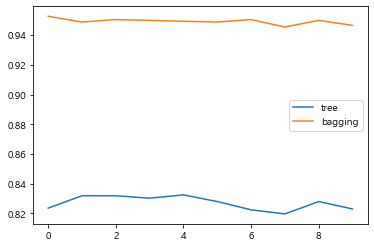

In [87]:
tree_bagging_frm.plot()

#### human_activity 데이터를 이용한 배깅 [실습]

In [89]:
features_name = pd.read_csv('./data/human_activity/features.txt',
                            sep    ='\s+' , 
                            header = None , 
                            names=['feature_name'])
features_name

,feature_name
0,tBodyAcc-Mean-1
1,tBodyAcc-Mean-2
2,tBodyAcc-Mean-3
3,tBodyAcc-STD-1
4,tBodyAcc-STD-2
...,...
556,tBodyGyro-AngleWRTGravity-1
557,tBodyGyroJerk-AngleWRTGravity-1
558,tXAxisAcc-AngleWRTGravity-1
559,tYAxisAcc-AngleWRTGravity-1


- train data

In [94]:
X_train = pd.read_csv('./data/human_activity/Train/X_train.txt',
                            sep    ='\s+' , 
                            header = None)
X_train.columns = features_name.loc[ : , 'feature_name']
X_train

feature_name,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


In [96]:
y_train = pd.read_csv('./data/human_activity/Train/y_train.txt',
                            sep    ='\s+' , 
                            header = None , 
                            names = ['target'])
y_train

,target
0,5
1,5
2,5
3,5
4,5
...,...
7762,2
7763,2
7764,2
7765,2


- test data

In [97]:
X_test = pd.read_csv('./data/human_activity/Test/X_test.txt',
                            sep    ='\s+' , 
                            header = None)
X_test.columns = features_name.loc[ : , 'feature_name']
X_test

feature_name,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,-0.534817,0.244280,...,0.125445,-0.390349,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104
3158,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,-0.557925,0.244280,...,0.150787,-0.336001,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748
3159,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,-0.604403,0.079255,...,-0.004765,-0.139894,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527
3160,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,-0.569571,0.079255,...,0.013540,-0.224141,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865


In [98]:
y_test = pd.read_csv('./data/human_activity/Test/y_test.txt',
                            sep    ='\s+' , 
                            header = None , 
                            names = ['target'])
y_test

,target
0,5
1,5
2,5
3,5
4,5
...,...
3157,2
3158,2
3159,2
3160,2


In [102]:
print('결측값 확인 - ')
print()
X_train.isna().sum().sum()

결측값 확인 - 



0

In [103]:
print('타겟의 분포에 따른 다른 평가지표를 사용할 수 도 있다 - ')
y_train['target'].value_counts()

타겟의 분포에 따른 다른 평가지표를 사용할 수 도 있다 - 


5     1423
6     1413
4     1293
1     1226
2     1073
3      987
11      90
9       75
10      60
12      57
7       47
8       23
Name: target, dtype: int64

In [107]:
def metrics_evaluation(target , prediction) :
    print('accuracy \n'  , accuracy_score(target , prediction))
    print()
    

In [108]:
tree_model = DecisionTreeClassifier(random_state = 111)
tree_model.fit(X_train , y_train)
y_pred = tree_model.predict(X_test)
metrics_evaluation(y_test , y_pred)

accuracy 
 0.8055028462998103



In [110]:
print('모델의 파라미터 확인 - ')
print()
tree_model.get_params()

모델의 파라미터 확인 - 



{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 111,
 'splitter': 'best'}

In [112]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}
grid_cv = GridSearchCV(tree_model , param_grid = params , scoring='accuracy' , cv = 5 , verbose = 1 )
grid_cv.fit(X_train , y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=111),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [119]:
print('최적의 파라미터 : ' , grid_cv.best_params_)
print('베스트 스코어 : ' , grid_cv.best_score_)
# print('파라미터 & 스코어 : ' , grid_cv.cv_results_)

최적의 파라미터 :  {'max_depth': 8}
베스트 스코어 :  0.8469211829804232


In [120]:
grid_cv_frm = pd.DataFrame(grid_cv.cv_results_)
grid_cv_frm[['param_max_depth' , 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.821169
1,8,0.846921
2,10,0.842154
3,12,0.834947
4,16,0.834303
5,20,0.828508
6,24,0.828508


In [121]:
print('bagging - randomforest')
print()

forest_model = RandomForestClassifier(random_state = 111)
forest_model.fit(X_train , y_train)
y_pred = forest_model.predict(X_test)
metrics_evaluation(y_test , y_pred)

bagging - randomforest

accuracy 
 0.9089184060721063



In [124]:
print('모델의 파라미터 확인 - ')
print()
forest_model.get_params()

모델의 파라미터 확인 - 



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 111,
 'verbose': 0,
 'warm_start': False}

In [127]:
params = {
    'n_estimators' : [10 , 100 , 200] , 
    'max_depth' : [6, 8, 10, 12, 16, 20, 24] , 
    'min_samples_leaf' : [8, 12, 18]
}

forest_model   = RandomForestClassifier(random_state = 111)
forest_grid_cv = GridSearchCV(forest_model , param_grid = params , scoring='accuracy' , cv = 5 , verbose = 1 , n_jobs = -1)
forest_grid_cv.fit(X_train , y_train)

print('최적의 파라미터 : ' , forest_grid_cv.best_params_)
print('베스트 스코어 : ' , forest_grid_cv.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
최적의 파라미터 :  {'max_depth': 12, 'min_samples_leaf': 8, 'n_estimators': 200}
베스트 스코어 :  0.9112956945539045


In [133]:
refit_forest_model   = RandomForestClassifier(random_state = 111 , max_depth= 12, min_samples_leaf= 8, n_estimators= 200)
refit_forest_model.fit(X_train , y_train)
y_pred = refit_forest_model.predict(X_test)
metrics_evaluation(y_test , y_pred)
print()
print()
best_estimator_model = forest_grid_cv.best_estimator_
best_estimator_model.fit(X_train , y_train)
y_pred = best_estimator_model.predict(X_test)
metrics_evaluation(y_test , y_pred)


accuracy 
 0.9029095509171411



accuracy 
 0.9029095509171411



피쳐 중요도 20개 시각화 한다면 - 



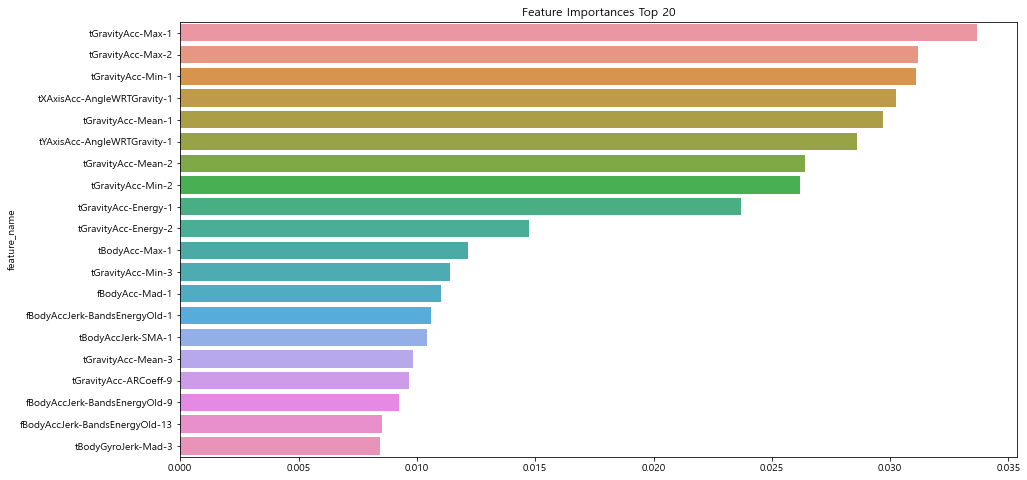

In [142]:
print('피쳐 중요도 20개 시각화 한다면 - ')
value = refit_forest_model.feature_importances_
data = pd.Series(value , index = X_train.columns)
top20 = data.sort_values(ascending=False)[:20]
print()
plt.figure(figsize=(15, 8))

sns.barplot(x= top20, y=top20.index)

plt.title('Feature Importances Top 20')
plt.show()
plt.close()

In [149]:
def human_activity_dataset() :
    features_name = pd.read_csv('./data/human_activity/features.txt',
                            sep    ='\s+' , 
                            header = None , 
                            names=['feature_name'])

    X_train = pd.read_csv('./data/human_activity/Train/X_train.txt',
                            sep    ='\s+' , 
                            header = None)
    X_train.columns = features_name.loc[ : , 'feature_name']
    
    X_test = pd.read_csv('./data/human_activity/Test/X_test.txt',
                            sep    ='\s+' , 
                            header = None)
    X_test.columns = features_name.loc[ : , 'feature_name']
    
    y_train = pd.read_csv('./data/human_activity/Train/y_train.txt',
                            sep    ='\s+' , 
                            header = None , 
                            names = ['target'])

    y_test = pd.read_csv('./data/human_activity/Test/y_test.txt',
                            sep    ='\s+' , 
                            header = None , 
                            names = ['target'])

    return X_train , X_test , y_train , y_test

In [150]:
X_train , X_test , y_train , y_test = human_activity_dataset()
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((7767, 561), (3162, 561), (7767, 1), (3162, 1))

#### AdaBoost

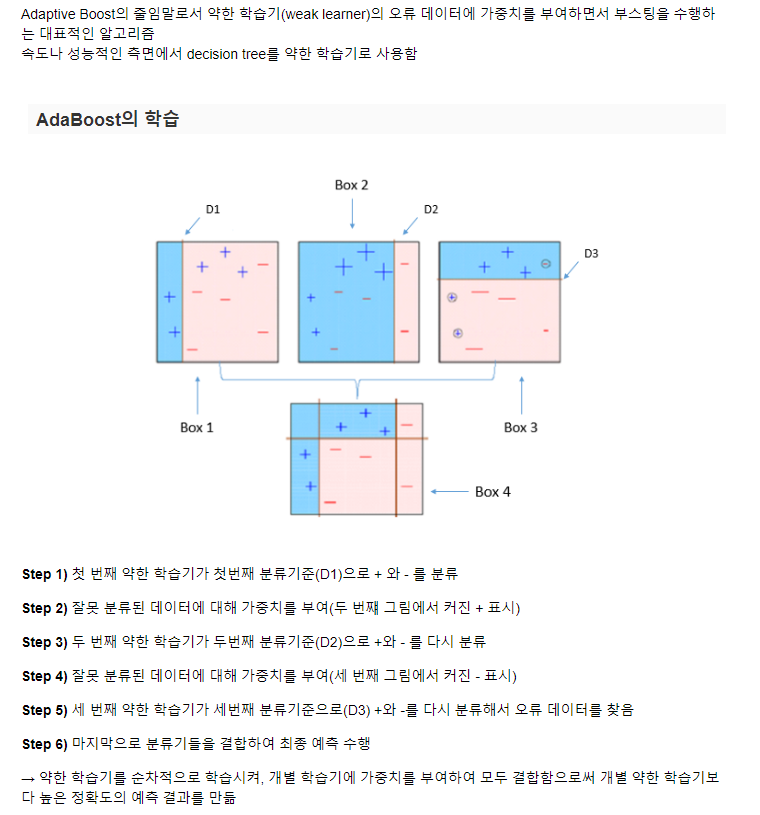

In [146]:
Image('c:\img/adaboost-01.png' , width=700)

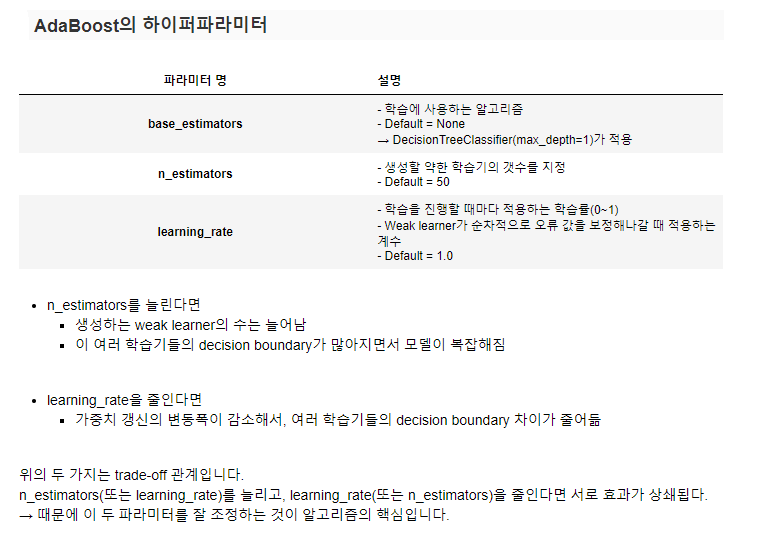

In [147]:
Image('c:\img/adaboost-02.png' , width=700)

In [161]:
ada_model = AdaBoostClassifier(random_state = 10 , 
                               n_estimators=60  , 
                               learning_rate = 0.6)
ada_model.fit(X_train , y_train)
y_pred = ada_model.predict(X_test)

metrics_evaluation(y_test , y_pred)

accuracy 
 0.6037318153067679



In [153]:
print('ada model params - ')
print()
ada_model.get_params()

ada model params - 



{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [158]:
print('[실습]')
print('하이퍼 파라미터를 이용한 베스트 파라미터를 찾고 학습/예측 수행 - ')

[실습]
하이퍼 파라미터를 이용한 베스트 파라미터를 찾고 학습/예측 수행 - 


#### eXtra Gradient Boost (XGBoost)

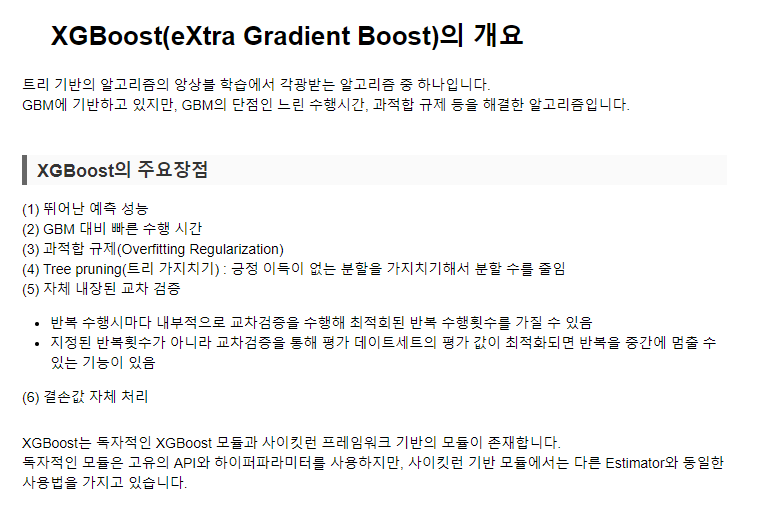

In [162]:
Image('c:\img/XGBoost-01.png' , width=700)

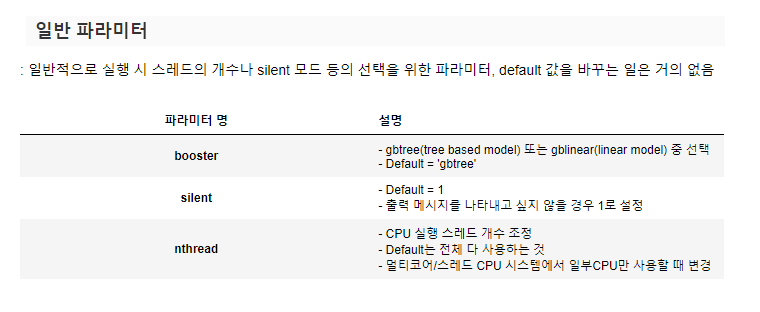

In [163]:
Image('c:\img/XGBoost-02.png' , width=700)

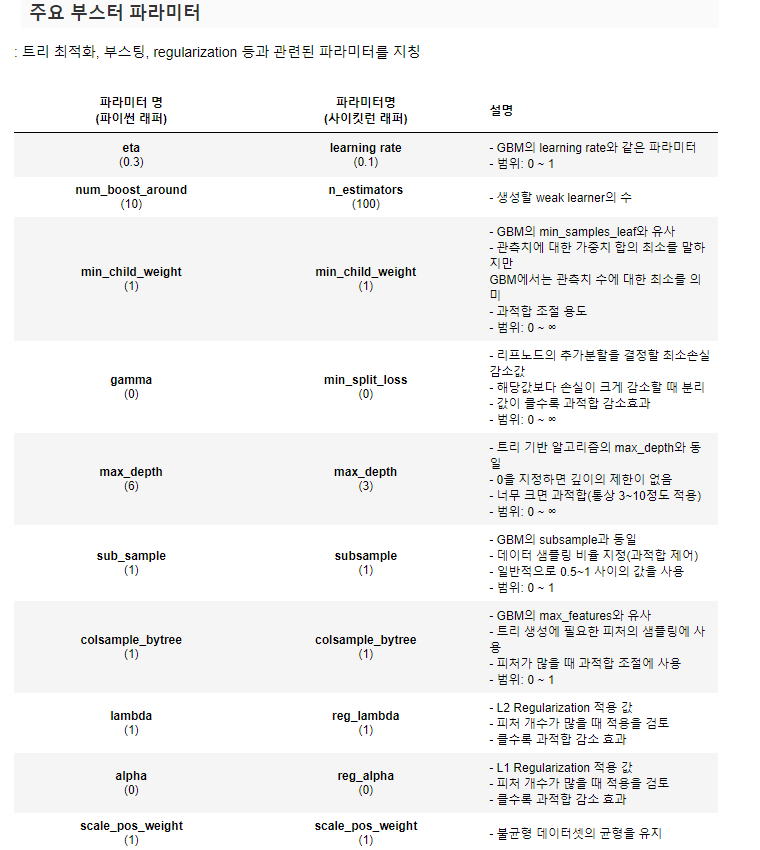

In [164]:
Image('c:\img/XGBoost-03.png' , width=700)

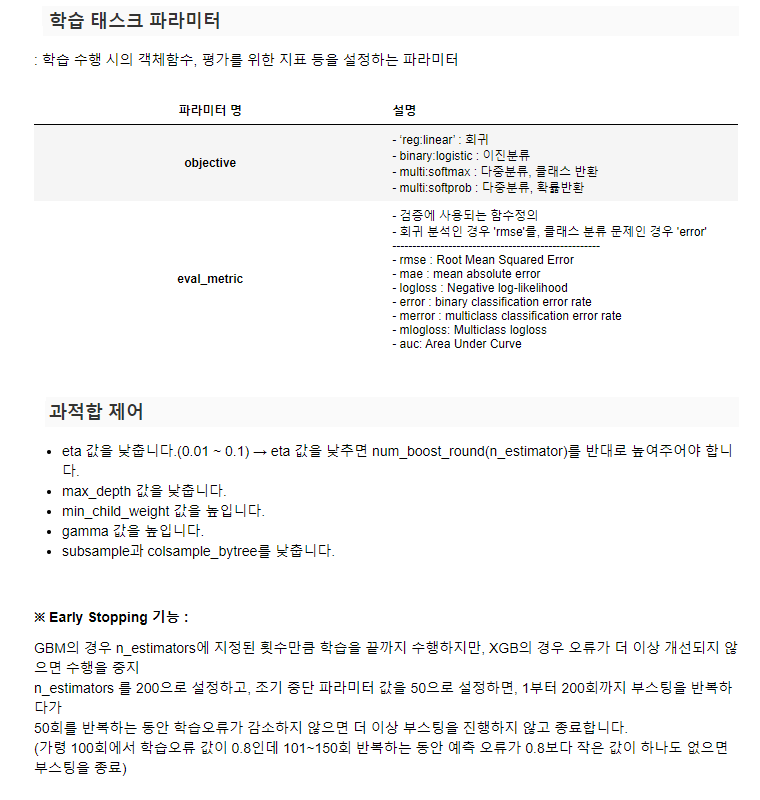

In [165]:
Image('c:\img/XGBoost-04.png' , width=700)

* conda install -c conda-forge xgboost
* from   xgboost                 import XGBClassifier

In [168]:
cancer = load_breast_cancer()

cancer_frm = pd.DataFrame(data    = cancer['data'] , 
                          columns = cancer['feature_names'])
cancer_frm['target'] = cancer['target']
cancer_frm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [170]:
def metrics_evaluation(target , prediction) :
    print('confusion_matrix \n' , confusion_matrix(target , prediction))
    print()
    print("*" * 100)
    print('accuracy \n'  , accuracy_score(target , prediction))
    print()
    print('recall \n'    , recall_score(target , prediction))
    print()
    print('precision \n' , precision_score(target , prediction))
    print()
    print('f1 score \n'  , f1_score(target , prediction))        

In [171]:
print('타켓의 분포 확인 - ')
cancer_frm['target'].value_counts()

타켓의 분포 확인 - 


1    357
0    212
Name: target, dtype: int64

In [172]:
cancer_label    =  cancer_frm['target']
cancer_features =  cancer_frm.drop(['target'] , axis = 1)

print('label type - ' , type(cancer_label) , 'features type - ' , type(cancer_features))

label type -  <class 'pandas.core.series.Series'> features type -  <class 'pandas.core.frame.DataFrame'>


In [173]:
X_train , X_test , y_train , y_test = train_test_split(cancer_features , 
                                                       cancer_label , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

In [176]:
xgboost_model = XGBClassifier(n_estimators = 400  ,  
                              learning_rate = 0.1 ,
                              max_depth = 3 )
xgboost_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_delta_step': None,
 'max_depth': 3,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 400,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [177]:
xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)
metrics_evaluation(y_test , y_pred)

[14:26:45] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion_matrix 
 [[46  3]
 [ 1 64]]

****************************************************************************************************
accuracy 
 0.9649122807017544

recall 
 0.9846153846153847

precision 
 0.9552238805970149

f1 score 
 0.9696969696969696


In [178]:
xgboost_model = XGBClassifier(n_estimators = 400  ,  
                              learning_rate = 0.1 ,
                              max_depth = 3 )
print('튜닝 - ')
print('logloss -> 오류에 대한 평가성능지표 함수')
print()
xgboost_model.fit(X_train, y_train , 
                  early_stopping_rounds = 100 , 
                  eval_metric = 'logloss' , 
                  eval_set = [(X_test , y_test)] , 
                  verbose = True ) 

튜닝 - 
logloss -> 오류에 대한 평가성능지표 함수

[0]	validation_0-logloss:0.61460
[1]	validation_0-logloss:0.55405
[2]	validation_0-logloss:0.49816
[3]	validation_0-logloss:0.44858
[4]	validation_0-logloss:0.40558
[5]	validation_0-logloss:0.37227
[6]	validation_0-logloss:0.34175
[7]	validation_0-logloss:0.31699
[8]	validation_0-logloss:0.29199
[9]	validation_0-logloss:0.27386
[10]	validation_0-logloss:0.25490
[11]	validation_0-logloss:0.23818
[12]	validation_0-logloss:0.22577
[13]	validation_0-logloss:0.21225
[14]	validation_0-logloss:0.20156
[15]	validation_0-logloss:0.19251
[16]	validation_0-logloss:0.18292
[17]	validation_0-logloss:0.17663
[18]	validation_0-logloss:0.17008
[19]	validation_0-logloss:0.16260
[20]	validation_0-logloss:0.15747
[21]	validation_0-logloss:0.15208
[22]	validation_0-logloss:0.14877
[23]	validation_0-logloss:0.14609
[24]	validation_0-logloss:0.14465
[25]	validation_0-logloss:0.14215
[26]	validation_0-logloss:0.13825
[27]	validation_0-logloss:0.13535
[28]	validation_0-loglo

[237]	validation_0-logloss:0.09292
[238]	validation_0-logloss:0.09305
[239]	validation_0-logloss:0.09291
[240]	validation_0-logloss:0.09316
[241]	validation_0-logloss:0.09301
[242]	validation_0-logloss:0.09287
[243]	validation_0-logloss:0.09301
[244]	validation_0-logloss:0.09292


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [179]:
y_pred = xgboost_model.predict(X_test)
metrics_evaluation(y_test , y_pred)

confusion_matrix 
 [[47  2]
 [ 1 64]]

****************************************************************************************************
accuracy 
 0.9736842105263158

recall 
 0.9846153846153847

precision 
 0.9696969696969697

f1 score 
 0.9770992366412214
